In [2]:
#Gerekli kütüphaneleri import ediyoruz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
#Veri setini yüklüyoruz
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Melbourne_housing_FULL.csv")

In [5]:
#Veri setinin kopyasını alıyoruz
dt_copy = data.copy()

In [6]:
#Veri setini ilk 5 verisini listeliyoruz
dt_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [7]:
#Veri setimizin şekil boyut ve sütün sayısını buluyoruz
print(f'Shape     : {dt_copy.shape}\n'
      f'Size      : {dt_copy.size}\n'
      f'Dimension : {dt_copy.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [8]:
#Veri setimizi inceliyoruz
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [9]:
#Veri kümesinin betimsel istatistiklerini inceliyoruz
dt_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [10]:
#Yenilemeli verileri buluyoruz
dt_copy.duplicated().sum()

1

In [11]:
#Yenilemeli verileri derinlemesine inceliyoruz
dt_copy.loc[dt_copy.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [12]:
#Yenilemeli verileri temizliyoruz
dt_copy.drop_duplicates(inplace=True)

In [13]:
#Kontrolünü sağlıyoruz
dt_copy.duplicated().sum()

0

In [14]:
#Kategorik sütünları buluyoruz
for column in dt_copy.select_dtypes(include='object'):
    categorical_columns = []
    categorical_columns.extend(dt_copy.select_dtypes(include='object'))

In [15]:
#Kategorik sütunları listeliyoruz
categorical_columns

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'CouncilArea',
 'Regionname']

In [16]:
#Nümerik sütunları buluyoruz
for column in dt_copy.select_dtypes(include=['number']):
    numerical_columns = []
    numerical_columns.extend(dt_copy.select_dtypes(include=['number']))

In [17]:
#Nümerik sütunları listeliyoruz
numerical_columns

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [18]:
#Boş değerlerin toplamına bakıyoruz
dt_copy.isnull().sum().sum()

100974

In [19]:
#Detaylı boş değerlere bakıyoruz
dt_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [20]:
#Aykırı değer sınırı mutlak değeri 3'den büyük olanlardır
outlier_threshold = 3
#Aykırı verileri tutmak için boş bir dataframe oluşturalım
dataF = pd.DataFrame()

#Aykırı verilerin tespiti için daha önce tanımladığımz numerical_columns'u kullanacağız

for column in numerical_columns:
    z_scores = np.abs(stats.zscore(dt_copy[column]))

    #Z-score hesapla ve aykırı değerleri bul
    dataF[column] = dt_copy[column][z_scores > outlier_threshold]


print("-----------Aykırı Değerler :--------")
dataF


-----------Aykırı Değerler :--------


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
81,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
426,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
538,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34212,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34367,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34412,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34494,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Aykırı değerleri temizle ve boyutnu göster
cleaned_data = dt_copy[~dt_copy.isin(dataF)].dropna()


In [22]:
cleaned_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4.0,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3.0,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2.0,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,27 Birchmore Rd,3.0,h,500000.0,PI,Ray,24/02/2018,25.5,3750.0,...,2.0,2.0,383.0,118.0,2016.0,Whittlesea City Council,-37.61940,145.03951,Northern Metropolitan,2940.0
34849,Wollert,35 Kingscote Wy,3.0,h,570000.0,SP,RW,24/02/2018,25.5,3750.0,...,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0
34853,Yarraville,29A Murray St,2.0,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2.0,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [23]:
# Eksik verileri tespit et
missing_data = dataF.isnull()

In [24]:
missing_data

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
81,False,True,True,True,True,True,True,True,True,True,True,True,True
175,False,True,True,True,True,True,True,True,True,True,True,True,True
426,False,True,True,True,True,True,True,True,True,True,True,True,True
496,False,True,True,True,True,True,True,True,True,True,True,True,True
538,False,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34212,False,True,True,True,True,True,True,True,True,True,True,True,True
34367,False,True,True,True,True,True,True,True,True,True,True,True,True
34412,False,True,True,True,True,True,True,True,True,True,True,True,True
34494,False,True,True,True,True,True,True,True,True,True,True,True,True


In [25]:
# Eksik verileri doldur(mod ile)
for column in dt_copy.columns:
    if dt_copy[column].dtype == 'float64' and 'int64':
        dt_copy[column].fillna(dt_copy[column].mean(), inplace=True)
    elif dt_copy[column].dtype.name == 'object':
        if dt_copy[column].isna().any():
            dt_copy[column].fillna(dt_copy[column].mode().iloc[0], inplace=True)


In [26]:
#Veri Boyutumuz
dt_copy.shape

(34856, 21)

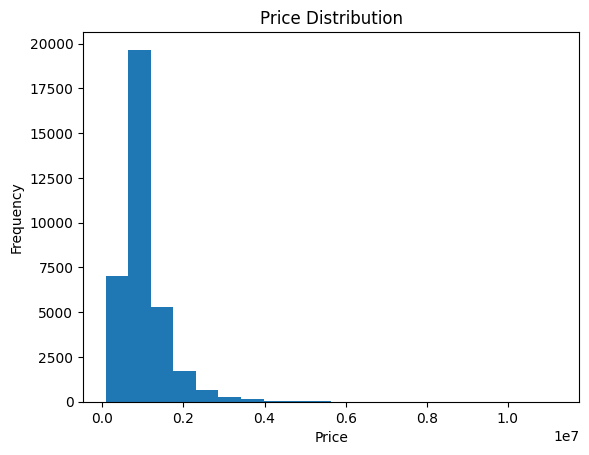

In [27]:
# Veriyi görselleştirme
plt.hist(dt_copy['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()



In [ ]:
#çalıştı sonrasında hata verdi sebebini çözemedim
sns.pairplot(dt_copy, vars=['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount', 'Price'])
plt.show()

<ipython-input-28-422e4582604e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  kol_matris = dt_copy.corr()


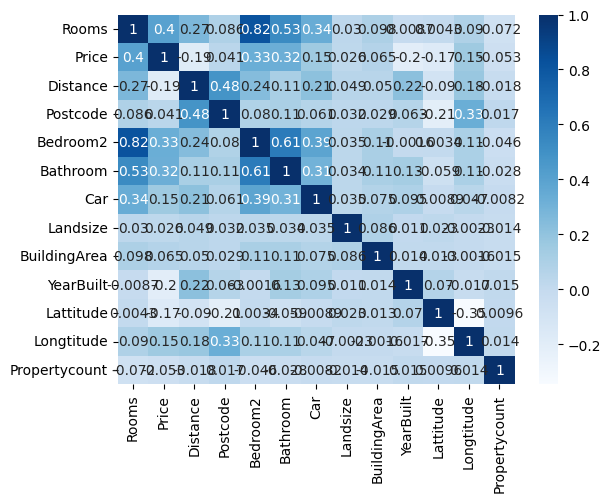

In [28]:
kol_matris = dt_copy.corr()
sns.heatmap(kol_matris,cmap="Blues", annot=True)
plt.show()

In [29]:
lbl_encoder = LabelEncoder()
one_encoder = OneHotEncoder()
for column in dt_copy.columns:
    if dt_copy[column].dtype.name == 'object':
        dt_copy[column] = lbl_encoder.fit_transform(dt_copy[column])

In [30]:
# Değişkenler (X) ve (y) belirleyin
X = dt_copy.drop(columns=['Price', 'Date','YearBuilt'])
y = dt_copy['Price']

In [31]:
# Veriyi eğitim ve test verilerine bakalım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Modelleri tanıtalım
my_modelss = {
    'Lasso': {'model': Lasso()},
    'LinearRegression': {'model': LinearRegression()},
    'Ridge': {'model': Ridge()},
    'ElasticNet': {'model': ElasticNet()},
    'KNeighborsRegressor': {'model': KNeighborsRegressor()},
    'RandomForestRegressor': {'model': RandomForestRegressor()},
    'GradientBoostingRegressor': {'model': GradientBoostingRegressor()},
    'AdaBoostRegressor': {'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)}
}

In [33]:
categorical_columns = dt_copy.select_dtypes(include=['object']).columns
# Veri setinde tipi "object" olan sütunları seç
categorical_data = dt_copy[categorical_columns]
# One-Hot Encoding uygulayarak kategorik sütunları dönüştür
dt_copy = pd.get_dummies(dt_copy, columns=categorical_columns)

In [34]:
information_dt = dt_copy.dtypes
print(information_dt)

Suburb             int64
Address            int64
Rooms              int64
Type               int64
Price            float64
Method             int64
SellerG            int64
Date               int64
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea        int64
Lattitude        float64
Longtitude       float64
Regionname         int64
Propertycount    float64
dtype: object


In [35]:
#Modellerin denenmesi ve performansı
dene = {}
for model_name, model_info in my_modelss.items():
    model = model_info['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    dene[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

In [36]:
#En iyi performans
iyi  = min(dene, key=lambda z: dene[z]['RMSE'])

In [37]:
print("----------Model Performansı-------:")
for model_name, metrics in dene.items():
    print(f"{model_name}:")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  R2: {metrics['R2']:.2f}")
    print()

print(f"En İyi Model: {iyi}")

----------Model Performansı-------:
Lasso:
  MAE: 288592.41
  MSE: 222069494577.89
  RMSE: 471242.50
  R2: 0.31

LinearRegression:
  MAE: 288592.49
  MSE: 222068391126.89
  RMSE: 471241.33
  R2: 0.31

Ridge:
  MAE: 288596.32
  MSE: 222091938142.11
  RMSE: 471266.31
  R2: 0.31

ElasticNet:
  MAE: 305045.75
  MSE: 288208637591.12
  RMSE: 536850.67
  R2: 0.11

KNeighborsRegressor:
  MAE: 357777.19
  MSE: 293863126393.80
  RMSE: 542091.44
  R2: 0.09

RandomForestRegressor:
  MAE: 226675.47
  MSE: 155099304797.33
  RMSE: 393826.49
  R2: 0.52

GradientBoostingRegressor:
  MAE: 242951.25
  MSE: 158368020057.84
  RMSE: 397954.80
  R2: 0.51

AdaBoostRegressor:
  MAE: 327852.97
  MSE: 223057498465.76
  RMSE: 472289.63
  R2: 0.31

En İyi Model: RandomForestRegressor
